<h1 align='center' style='color:black'> Customer Segmentation </h1>

<img src='Customer Segmentation.PNG' />

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,accuracy_score,f1_score
%matplotlib inline

## Loading Data

In [21]:
# Showing all the columns
pd.set_option('display.max_columns',None) 
#pd.set_option('display.max_rows',None)

In [22]:
data=pd.read_csv('cust_seg.csv')
# Printing the data
data

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2015-02-28,1183296,N,ES,H,27,2013-09-25,0.0,22,1.0,NaN,1.0,A,S,N,NaN,KFC,N,1.0,28.0,MADRID,1.0,55516.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1
999996,999996,2015-02-28,1183295,N,ES,H,56,2013-09-25,0.0,22,1.0,NaN,1.0,A,S,N,NaN,KFC,N,1.0,15.0,"CORUÑA, A",1.0,75654.84,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
999997,999997,2015-02-28,1183294,N,ES,V,39,2013-09-25,0.0,22,1.0,NaN,1.0,A,S,N,NaN,KFC,N,1.0,15.0,"CORUÑA, A",1.0,80634.87,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1
999998,999998,2015-02-28,1183293,N,ES,V,36,2013-09-25,0.0,22,1.0,NaN,1.0,A,S,S,NaN,KFC,N,1.0,28.0,MADRID,1.0,57818.46,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1


In [5]:
# Putting the data into dataframe
df= pd.DataFrame(data)
df.head()

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


## EDA (Exploratory Data Analysis)

## Printing the Shape

In [23]:
print ("The Shape is : ",data.shape)

The Shape is :  (1000000, 48)


## Printing the Columns Names

In [24]:
print(data.columns)

Index(['Unnamed: 0', 'fecha_dato', 'ncodpers', 'ind_empleado',
       'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo',
       'antiguedad', 'indrel', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes',
       'indresi', 'indext', 'conyuemp', 'canal_entrada', 'indfall', 'tipodom',
       'cod_prov', 'nomprov', 'ind_actividad_cliente', 'renta',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')


## Removing 'Unnamed: 0' column

In [25]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
# Printing the data after removing 'Unnamed: 0' column
data.head(2)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


## Data Describtion

In [26]:
data.describe()

,ncodpers,ind_nuevo,indrel,indrel_1mes,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.000000e+06,989218.000000,989218.000000,989218.000000,989218.0,982266.000000,989218.000000,8.248170e+05,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,994598.000000,994598.000000,1000000.000000
mean,6.905967e+05,0.000489,1.109074,1.000085,1.0,26.852131,0.564971,1.396462e+05,0.000177,0.000039,0.749626,0.000591,0.105296,0.013623,0.009894,0.212486,0.072079,0.002158,0.003150,0.066881,0.106267,0.027182,0.009982,0.014553,0.004661,0.072581,0.066084,0.039378,0.006442,0.071629,0.079543,0.166275
std,4.044084e+05,0.022114,3.267624,0.012954,0.0,12.422924,0.495761,2.389858e+05,0.013303,0.006245,0.433229,0.024303,0.306935,0.115920,0.098975,0.409067,0.258619,0.046404,0.056036,0.249816,0.308179,0.162614,0.099410,0.119755,0.068112,0.259448,0.248429,0.194493,0.080003,0.257873,0.270584,0.372327
min,1.588900e+04,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,1.202730e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.364110e+05,0.000000,1.000000,1.000000,1.0,18.000000,0.000000,7.157184e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.644760e+05,0.000000,1.000000,1.000000,1.0,28.000000,1.000000,1.066519e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.074511e+06,0.000000,1.000000,1.000000,1.0,33.000000,1.000000,1.634325e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.379131e+06,1.000000,99.000000,3.000000,1.0,52.000000,1.000000,2.889440e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Describibg the customer's age 
data['age'].describe()

count     1000000
unique        115
top            22
freq        51017
Name: age, dtype: object

In [10]:
# Describibg the customer's sex 
data['sexo'].describe()

count     989214
unique         2
top            V
freq      562000
Name: sexo, dtype: object

In [11]:
# Describibg the customer relation type at the beginning of the month 
data['tiprel_1mes'].describe()

count     989218
unique         3
top            A
freq      547800
Name: tiprel_1mes, dtype: object

In [12]:
# Describibg the residence index (S (Yes) or N (No) if the residence country is the same than the bank country)
data['indresi'].describe()

count     989218
unique         2
top            S
freq      982264
Name: indresi, dtype: object

In [13]:
# Describibg the foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)
data['indext'].describe()

count     989218
unique         2
top            N
freq      946328
Name: indext, dtype: object

In [14]:
# Describibg the Spouse index (1 if the customer is spouse of an employee)
data['conyuemp'].describe()

count     178
unique      2
top         N
freq      176
Name: conyuemp, dtype: object

In [15]:
# Describibg the deceased index
data['indfall'].describe()

count     989218
unique         2
top            N
freq      986107
Name: indfall, dtype: object

In [33]:
#The data seems very sparse, thus we will check the columns with alot of zeros
#'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
#'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
#      'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
#       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
#       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
#       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
#       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
#       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'
data['pais_residencia'].astype('category').value_counts()

ES    982264
FR       546
AR       542
DE       487
GB       480
       ...  
ML         2
MM         2
OM         2
IS         2
AL         1
Name: pais_residencia, Length: 113, dtype: int64

## Looking for Missing Values

In [27]:
data.isnull().sum()

fecha_dato                    0
ncodpers                      0
ind_empleado              10782
pais_residencia           10782
sexo                      10786
age                           0
fecha_alta                10782
ind_nuevo                 10782
antiguedad                    0
indrel                    10782
ult_fec_cli_1t           998899
indrel_1mes               10782
tiprel_1mes               10782
indresi                   10782
indext                    10782
conyuemp                 999822
canal_entrada             10861
indfall                   10782
tipodom                   10782
cod_prov                  17734
nomprov                   17734
ind_actividad_cliente     10782
renta                    175183
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin_ult1             0
ind_ctop_fin_ult1             0
ind_ctpp

## Printing Data Type and Capacity of The Data on The Memory

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   fecha_dato             1000000 non-null  object 
 1   ncodpers               1000000 non-null  int64  
 2   ind_empleado           989218 non-null   object 
 3   pais_residencia        989218 non-null   object 
 4   sexo                   989214 non-null   object 
 5   age                    1000000 non-null  object 
 6   fecha_alta             989218 non-null   object 
 7   ind_nuevo              989218 non-null   float64
 8   antiguedad             1000000 non-null  object 
 9   indrel                 989218 non-null   float64
 10  ult_fec_cli_1t         1101 non-null     object 
 11  indrel_1mes            989218 non-null   float64
 12  tiprel_1mes            989218 non-null   object 
 13  indresi                989218 non-null   object 
 14  indext             

## Some Statistics

In [20]:
# Printing the values of (Sex) column with its domain
data['sexo'].value_counts()

V    562000
H    427214
Name: sexo, dtype: int64

In [21]:
# Printing the values of (deceased index) column with its domain
data['indfall'].value_counts()

N    986107
S      3111
Name: indfall, dtype: int64

In [22]:
# Printing the values of (Spouse index) column with its domain
data['conyuemp'].value_counts()

N    176
S      2
Name: conyuemp, dtype: int64

In [23]:
# Printing the values of (foreigner index) column with its domain
data['indext'].value_counts()

N    946328
S     42890
Name: indext, dtype: int64

In [24]:
# Printing the values of (residence index) column with its domain
data['indresi'].value_counts()

S    982264
N      6954
Name: indresi, dtype: int64

In [25]:
# Printing the values of (Customer relation type at the beginning of the month) column with its domain
data['tiprel_1mes'].value_counts()

A    547800
I    441377
P        41
Name: tiprel_1mes, dtype: int64

## Finding the Duplicate Rows

In [36]:
data.duplicated().sum()

0

## Feature Extraction

## Handling the  Missing Values

In [29]:
#drop all variables that have more than 80% of the data missing (conyuemp,ult_fec_cli_1t)
data.drop(['conyuemp'],axis=1,inplace=True)
data.drop(['ult_fec_cli_1t'],axis=1,inplace=True)
data.head(1)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,1.0,A,S,N,KHL,N,1.0,29.0,MALAGA,1.0,87218.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [30]:
#remove all rows with no age
data['age'].replace({" NA":""},inplace=True)
data['age'] = pd.to_numeric(data['age'])
data.dropna(subset = ['age'],inplace = True)
data.isnull().sum()

fecha_dato                    0
ncodpers                      0
ind_empleado                  0
pais_residencia               0
sexo                          4
age                           0
fecha_alta                    0
ind_nuevo                     0
antiguedad                    0
indrel                        0
indrel_1mes                   0
tiprel_1mes                   0
indresi                       0
indext                        0
canal_entrada                79
indfall                       0
tipodom                       0
cod_prov                   6952
nomprov                    6952
ind_actividad_cliente         0
renta                    164401
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin_ult1             0
ind_ctop_fin_ult1             0
ind_ctpp_fin_ult1             0
ind_deco_fin_ult1             0
ind_deme

In [36]:
#replace sex, canal_entrada, ind_nomina_ult1 and ind_nom_pens_ult1 using mode
data['ind_nom_pens_ult1'] = data['ind_nom_pens_ult1'].fillna(data['ind_nom_pens_ult1'].mode()[0])
data['ind_nomina_ult1'] = data['ind_nomina_ult1'].fillna(data['ind_nomina_ult1'].mode()[0])
data['sexo'] = data['sexo'].fillna(data['sexo'].mode()[0])

In [38]:
#replce renta (gross income of household) using the mean
data['renta'] = data['renta'].fillna(data['renta'].mean())

In [40]:
#replace the customer's country of resident by code 0 for countries outside europe
data['cod_prov'] = data['cod_prov'].fillna(0)
data['nomprov'] = data['nomprov'].fillna('NotEuropean')

In [42]:
#replace the customers channel used to join using the mode
data['canal_entrada'] = data['canal_entrada'].fillna(data['canal_entrada'].mode()[0])

In [43]:
data.isnull().sum()

fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
canal_entrada            0
indfall                  0
tipodom                  0
cod_prov                 0
nomprov                  0
ind_actividad_cliente    0
renta                    0
ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
ind_fond_fin_ult1        0
ind_hip_fin_ult1         0
ind_plan_fin_ult1        0
i

In [44]:
data.to_csv(r'output.csv', index = False)

## Checking Normality of Variables

## Outliers Detection and Removing

## Checking Correlation - to see how much those variables  are related 

In [ ]:
#cod_prov and nom_prov provide the same information 

## Data Visualization

<AxesSubplot:>

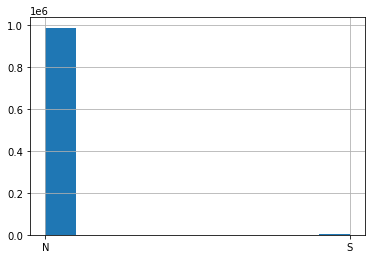

In [26]:
# Plotting the deceased index
data.indfall.hist()

<AxesSubplot:>

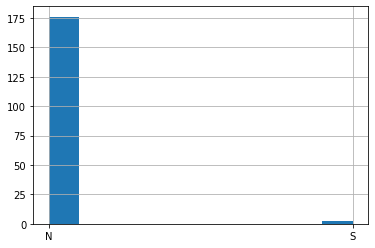

In [27]:
# Plotting the Spouse index
data.conyuemp.hist()

<AxesSubplot:>

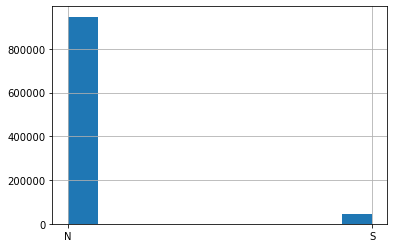

In [28]:
# Plotting the foreigner index
data.indext.hist()

<AxesSubplot:>

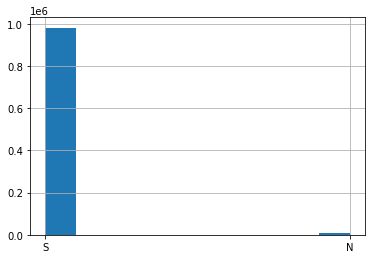

In [29]:
# Plotting the residence index 
data.indresi.hist()

<AxesSubplot:>

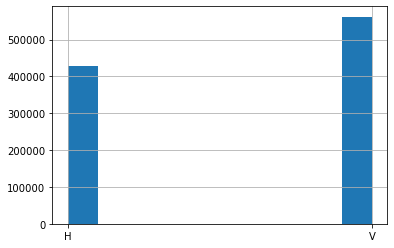

In [31]:
# Plotting Customer's sex
data.sexo.hist()

<AxesSubplot:>

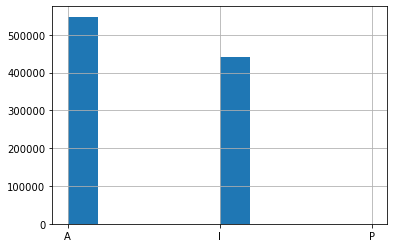

In [32]:
# Customer relation type at the beginning of the month (A (active), I (inactive), P (former customer),R (Potential))
data.tiprel_1mes.hist()

array([<AxesSubplot:title={'center':'H'}>,
       <AxesSubplot:title={'center':'V'}>], dtype=object)

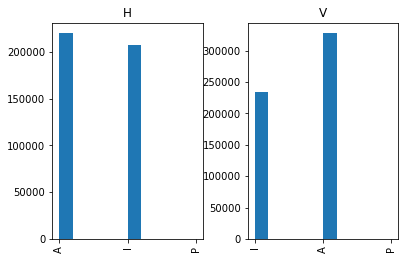

In [33]:
# Customer relation type at the beginning of the month by sex
data.tiprel_1mes.hist(by=data.sexo)

## Feature Selection

## Feature Scaling

## Model Building

## Model Evaluation

## Model Saving